In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import seaborn as sns

C:\Users\swast\AppData\Local\Temp/ipykernel_5884/1474267057.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_year_renewable = nrg.median(axis=0)
C:\Users\swast\AppData\Local\Temp/ipykernel_5884/1474267057.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  med_year_gni = gni.median(axis=0)


                gni  renewable
gni        1.000000   0.876692
renewable  0.876692   1.000000
                gni  renewable
gni        1.000000   0.802386
renewable  0.802386   1.000000


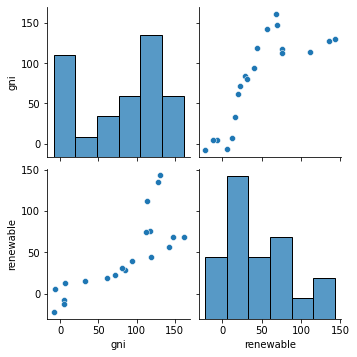

In [14]:
gni = pd.read_csv('https://raw.githubusercontent.com/S-Shrey-09/DataVizProject/main/Selected-organised%20Data%20for%20plotting/GNIdataPlot.csv')
nrg = pd.read_csv('https://raw.githubusercontent.com/S-Shrey-09/DataVizProject/main/Selected-organised%20Data%20for%20plotting/Renewables%20per%20capita%20dataplot.csv')

#organising data to find correlation between medians of years
#finding median value of years  1999 to 2019 for all all countries 
med_year_renewable = nrg.median(axis=0)
med_year_gni = gni.median(axis=0)

#finding base rate percent of median data from year 2000 to 2019
renewable_base_rates=[((med_year_renewable[i+2]-med_year_renewable[1])/med_year_renewable[1])*100 for i in range(0,20)]
gni_base_rates=[((med_year_gni[i+2]-med_year_gni[1])/med_year_gni[1])*100 for i in range(0,20)]

# creating a dataframe with base rate values 
df_median_data=pd.DataFrame({"gni":gni_base_rates,"renewable":renewable_base_rates})

#finding corelation btw gni and renewable base rates using spearman & pearson method
print(df_median_data.corr(method='spearman'))
print(df_median_data.corr(method='pearson'))
sns.pairplot(df_median_data)

In [4]:
#for making a new total_change column 
gni.drop(gni.index[10])
gni=gni.reset_index(drop=True)
total_change_list = [((gni.iloc[i,22]-gni.iloc[i,2])/gni.iloc[i,2]) for i in range(0,25)]
gni['total_change'] = total_change_list

nrg.drop(gni.index[10])
nrg=nrg.reset_index(drop=True)
total_change_list = [((nrg.iloc[i,22]-nrg.iloc[i,2])/nrg.iloc[i,2]) for i in range(0,25)]
nrg['total_change'] = total_change_list

#print(nrg)
#print(gni)

gni.to_csv('GNI_W_Change.csv', index=False)
nrg.to_csv('Renewable_W_Change.csv', index=False)

In [5]:
#importing new data with total_change column
gni = pd.read_csv('https://raw.githubusercontent.com/S-Shrey-09/DataVizProject/main/Data%20with%20total_change/GNI_W_Change.csv')
nrg = pd.read_csv('https://raw.githubusercontent.com/S-Shrey-09/DataVizProject/main/Data%20with%20total_change/Renewable_W_Change.csv')

              total_change  total_change
total_change      1.000000      0.316191
total_change      0.316191      1.000000


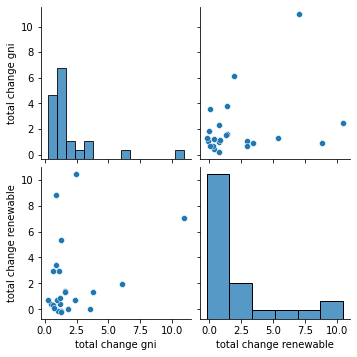

In [6]:
#organising data to find correlation between medians of countries
#making total change seperate columns 
total_gni_inc = gni['total_change']
total_nrg_inc = nrg['total_change']

#making a combined matrix with concat
total_inc = pd.concat([total_gni_inc, total_nrg_inc], axis=1)

#spearman and pearson correlations on combined lists
pe_inc = total_inc.corr(method='pearson')

print(pe_inc)
total_inc.columns=['total change gni','total change renewable']
sns.pairplot(total_inc)

              total_change  total_change
total_change      1.000000      0.551395
total_change      0.551395      1.000000
              total_change  total_change
total_change      1.000000      0.308552
total_change      0.308552      1.000000


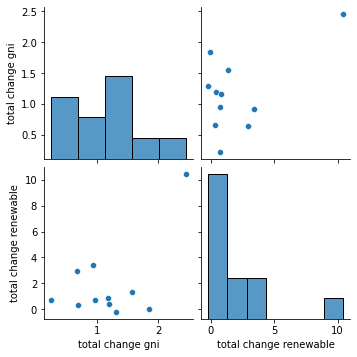

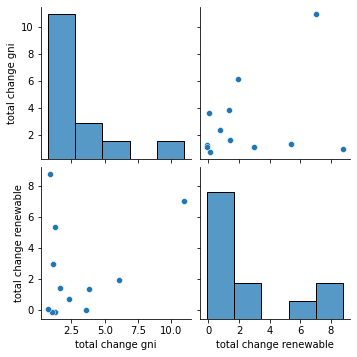

In [12]:
#organising data to find correlation between rich and poor countries
gni_u = gni.loc[gni['2019']>11250]
gni_l = gni.loc[gni['2019']<11250]
nrg_u = nrg.loc[gni['2019']>11250]
nrg_l = nrg.loc[gni['2019']<11250]

#total gni inc of rich and poor countries seperate
total_gni_inc_u = gni_u['total_change']
total_gni_inc_l = gni_l['total_change']

#total renewable inc of rich and poor countries seperate
total_nrg_inc_u = nrg_u['total_change']
total_nrg_inc_l = nrg_l['total_change']

#combining gni and nrg 
total_inc_u = pd.concat([total_gni_inc_u, total_nrg_inc_u], axis=1)
total_inc_l = pd.concat([total_gni_inc_l, total_nrg_inc_l], axis=1)

#pearson corr
pe_inc_u = total_inc_u.corr(method='pearson')
pe_inc_l = total_inc_l.corr(method='pearson')
print(pe_inc_u)
print(pe_inc_l)
total_inc_u.columns=['total change gni','total change renewable']
sns.pairplot(total_inc_u)
total_inc_l.columns=['total change gni','total change renewable']
sns.pairplot(total_inc_l)

In [8]:
#printing total_inc to see which countries cause data to give bad correlation
print(total_inc)

    total_change  total_change
0       1.620915      1.425383
1       0.484169      0.404611
2       1.561101      1.339280
3       3.595238      0.032462
4       1.194719      0.382155
5       1.250000     -0.101409
6      10.988372      7.036468
7       0.919540      3.425283
8       1.053435     -0.114920
9       0.672305      0.337705
10           NaN      2.072573
11      6.105263      1.921325
12      3.818182      1.357947
13      1.091954      2.971315
14      0.233392      0.736225
15      0.656062      2.964333
16      1.269504      5.359438
17      0.718693      0.097795
18      1.297130     -0.201122
19      1.850399     -0.014088
20      2.344828      0.734464
21      2.459459     10.443293
22      0.959311      0.743194
23      1.166036      0.836480
24      0.916667      8.790696


              total_change  total_change
total_change      1.000000      0.995411
total_change      0.995411      1.000000
              total_change  total_change
total_change      1.000000     -0.091691
total_change     -0.091691      1.000000
              total_change  total_change
total_change      1.000000      0.904762
total_change      0.904762      1.000000
              total_change  total_change
total_change      1.000000      0.071429
total_change      0.071429      1.000000


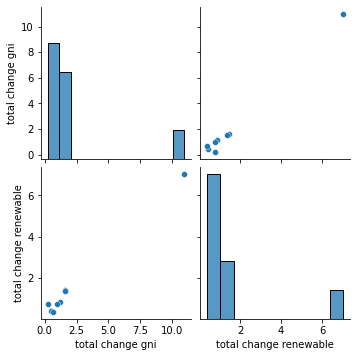

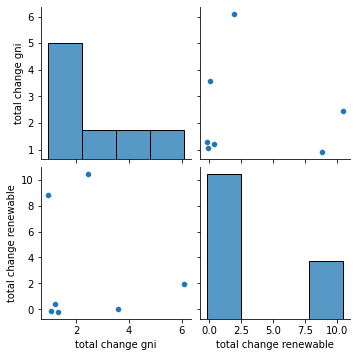

In [13]:
#selecting countries with good and bad correlation based on the above list
gni_g = gni.iloc[[0,1,2,6,23,22,9,14]]
gni_b = gni.iloc[[24,21,18,4,8,3,11]]
nrg_g = nrg.iloc[[0,1,2,6,23,22,9,14]]
nrg_b = nrg.iloc[[24,21,18,4,8,3,11]]


#total gni inc of good and bad corr countries seperate
total_gni_inc_g = gni_g['total_change']
total_gni_inc_b = gni_b['total_change']

#total renewable inc of good and bad corr countries seperate
total_nrg_inc_g = nrg_g['total_change']
total_nrg_inc_b = nrg_b['total_change']

#combining gni and nrg 
total_inc_g = pd.concat([total_gni_inc_g, total_nrg_inc_g], axis=1)
total_inc_b = pd.concat([total_gni_inc_b, total_nrg_inc_b], axis=1)

#pearson corr
pe_inc_g = total_inc_g.corr(method='pearson')
pe_inc_b = total_inc_b.corr(method='pearson')
print(pe_inc_g)
print(pe_inc_b)

#spearman corr
sp_inc_g = total_inc_g.corr(method='spearman')
sp_inc_b = total_inc_b.corr(method='spearman')
print(sp_inc_g)
print(sp_inc_b)
total_inc_g.columns=['total change gni','total change renewable']
sns.pairplot(total_inc_g)
total_inc_b.columns=['total change gni','total change renewable']
sns.pairplot(total_inc_b)

In [10]:
#final list of countries that support and oppose hypothesis 
seperate_countries_list = pd.DataFrame({"Good_corr":gni_g['Country Name'], "Bad_corr":gni_b['Country Name']})
print(seperate_countries_list.fillna('-'))

        Good_corr          Bad_corr
0         Algeria                 -
1       Argentina                 -
2       Australia                 -
3               -        Bangladesh
4               -            Canada
6           China                 -
8               -  Egypt, Arab Rep.
9          France                 -
11              -         Indonesia
14          Japan                 -
18              -            Norway
21              -            Poland
22  United States                 -
23          World                 -
24              -      South Africa
